In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statistics import mean
from rlhfutils.rl_utils import get_synth_rewards
from tqdm import tqdm
from datasets import Dataset, concatenate_datasets

/u/prasanns/miniconda3/envs/rlhfenv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


[2024-03-17 22:48:10,210] [INFO] [real_accelerator.py:110:get_accelerator] Setting ds_accelerator to cuda (auto detect)


/u/prasanns/miniconda3/envs/rlhfenv/lib/python3.10/site-packages/trl/trainer/ppo_config.py:142: UserWarning: The `optimize_cuda_cache` argument will be deprecated soon, please use `optimize_device_cache` instead.
  warnings.warn(


In [2]:
%load_ext autoreload
%autoreload 2

In [211]:
# tlog = pd.read_json("../../outputs/bagofwords/dynarmlogs/expbow50_updatereprod_fix.jsonl", orient='records', lines=True)
tlog = pd.read_json("../../active-rlhf/outputs/results/dynarmlogs/ultra/tiny_rm_conf_active_final.jsonl", orient='records', lines=True, nrows=64000)
# tlog = pd.read_json("../../active-rlhf/outputs/results/rollouts/math/ppo_goldb8easy4fix.jsonl", orient='records', lines=True, nrows=64000)

# tlog = pd.read_json("../../activereprod/active-rlhf/outputs/results/dynarmlogs/math/u/prasanns/research/active-rlhf/outputs/models/math/tiny_rm_rand_subsamp_onlymathreprod3.jsonl", orient='records', lines=True)
# tlog = pd.read_json("../outputs/results/dynarmlogs/.jsonl", orient='records', lines=True)
tmp = tlog
if 'golds' not in tmp.keys():
    tmp['golds'] = tmp['rewards']

tmp = tmp.dropna(subset='golds')
print(len(tmp))

3184


In [212]:
rat = 0
ngs = []
accs = []
sind = 0
for ind, row in tmp.iloc[sind:].iterrows():
    # row['golds'] = get_synth_rewards(row['texts'], 'bagofwords')
    if len(row['golds'])==0:
        continue
    ngs.append(row['golds'])
    if row['golds'][0]==row['golds'][1]:
            continue
    if ((row['rewards'][0]>row['rewards'][1])!=(row['golds'][0]>row['golds'][1])):
        rat+=1
        accs.append(0)
    else:
        accs.append(1)
#tmp['golds'] = ngs
print(rat/len(ngs))

0.29396984924623115


In [213]:
tot, corr = 0, 0
vals = []
interv = 25
for j in range(0, len(accs), interv):
    vals.append(mean(accs[j:j+interv]))
    # # check heuristic accuracy
    # for i, row in tmp.iloc[j:j+interv].iterrows():
    #     # if abs(row['rewards'][0]-row['rewards'][1])>row['thresh']:
    #     if row['golds'][0]==row['golds'][1]:
    #         continue
    #     tot = tot+1
    #     corr += 1 if ((row['rewards'][0]>row['rewards'][1])==(row['golds'][0]>row['golds'][1])) else 0
    # vals.append(corr/tot)

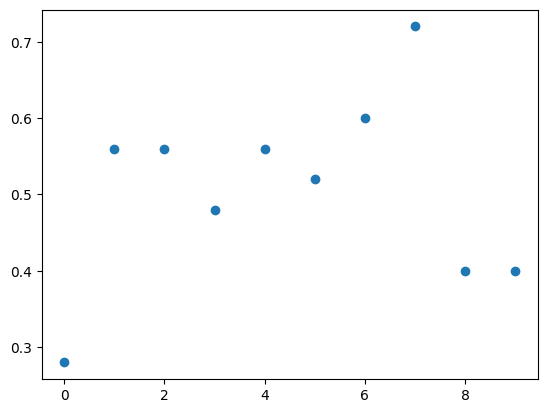

In [214]:
plt.scatter(range(len(vals)), vals)

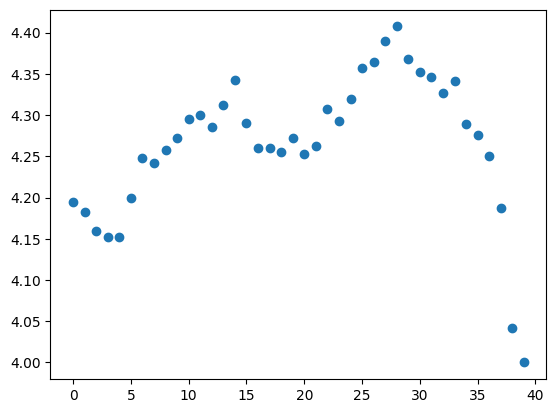

In [215]:
means = [mean(m) for m in ngs]
# means = [mean(m) for m in tmp['rewards']]

interv = 10
mbins = [mean(means[i:i+100]) for i in range(0, len(means), interv)]
plt.scatter(range(len(mbins)), mbins)

In [216]:
max(mbins)

4.4075

In [194]:
tmp.iloc[1000:1010]

,texts,rewards,golds,call
1000,[Question: (((8 * 6) * 2) + 9) = \n\nAnswer: ...,"[-0.23632812500000003, -0.33984375]","[2.619047619047619, 2.611111111111111]","[63, 63]"
1001,[Question: (((2 * 9) * 4) - 2) = \n\nAnswer: ...,"[-0.2353515625, -0.2412109375]","[3.174603174603174, 3.611111111111111]","[63, 63]"
1002,[Question: (((7 * 8) - 4) - 8) = \n\nAnswer: ...,"[-0.208984375, -0.2314453125]","[2.444444444444444, 2.0]","[63, 63]"
1003,[Question: (((4 * 9) - (2 - 7)) - 2) = \n\nAns...,"[0.125, 0.12304687500000001]","[2.70021645021645, 1.7568779904306222]","[63, 63]"
1004,[Question: (((3 * 5) - 1) + 8) = \n\nAnswer: ...,"[-0.2470703125, -0.27734375]","[3.055555555555556, 2.166666666666667]","[63, 63]"
1005,[Question: (((9 * 3) * 5) + (4 * 3)) = \n\nAns...,"[-0.255859375, -0.259765625]","[3.178436147186147, 2.76176948051948]","[63, 63]"
1006,[Question: (((8 * 2) * 2) - 7) = \n\nAnswer: r...,"[-0.039306640625, -0.279296875]","[2.111111111111111, 2.444444444444444]","[63, 63]"
1007,[Question: (((1 * 4) * 1) * 4) = \n\nAnswer: ...,"[-0.1142578125, -0.2734375]","[4.166666666666667, 3.092592592592593]","[63, 63]"
1008,[Question: (((1 * 3) + 6) - 2) = \n\nAnswer: ...,"[-0.373046875, -0.251953125]","[2.777777777777777, 5.0]","[64, 64]"
1009,[Question: (((4 - 2) - 9) + (2 + 9)) = \n\nAns...,"[0.0137939453125, -0.23828125]","[2.285714285714286, 2.957417582417582]","[64, 64]"


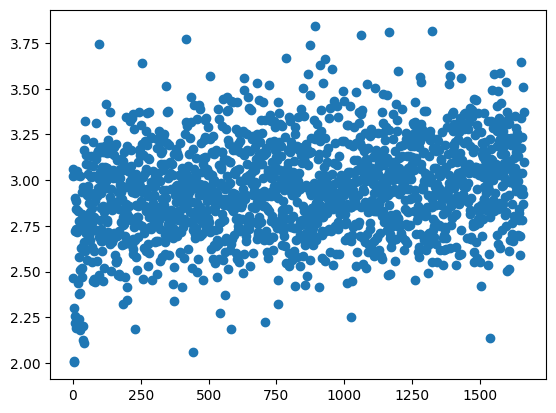

In [50]:
means = [mean(m) for m in tmp['golds']]
plt.scatter(range(len(means)), means)